In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistical_tests as st
%load_ext autoreload
%autoreload 2

In [5]:
# reading in the data
filename = 'final_hourly.csv'
data = st.read_csv(filename)
display(data.head(3))

,global_active_power
datetime,
2006-12-18 00:00:00,16.582
2006-12-18 01:00:00,18.798
2006-12-18 02:00:00,17.068


## Testing Global Active Power for Statistical Normality

I will use a D'Agostino's $K^2$ Test to check if the target variable exhibits a Gaussian-like distribution

We can make the following interpretations about p-values in statistical testing:
* If $p < alpha$: reject H0 that the distribution is normal i.e. it is not normal
* If $p > alpha$: fail to reject H0 that it is normal, i.e. it is normal

In [10]:
# using my own function I will perform a test for statistical normality
stat, p = st.normality_test(data=data)
# also using an alpha level of 0.05 to compare p-values
# H0: The distribution is normal
# H1: The distribution is not normal
print(p)

Data is not Gaussian: reject the null hypothesis, and accept the alternative
0.0


A visualisation to show that the distribution is not Gaussian:

Kurtosis of Global Active Power Distribution: 1.767439008699835
Skewness of Global Active Power Distribution: 1.2985712696403238


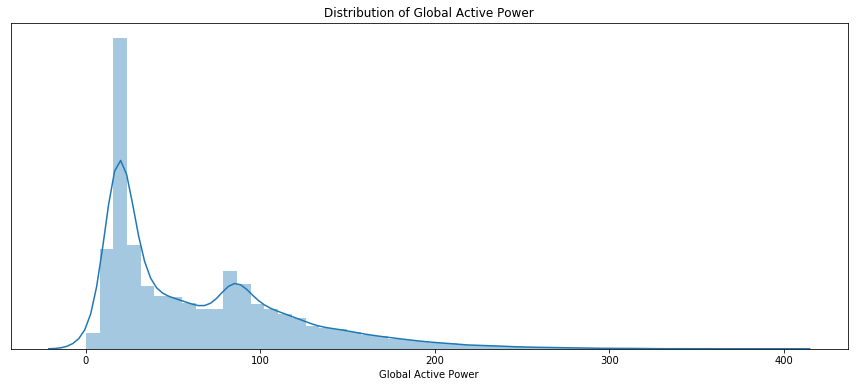

In [13]:
# using my own function I will visualise the distribution of global active power
st.distribution_plot(data)

There appears to be two peaks in global active power, suggesting a *bimodal* distribution 

We can use metrics to show deviation away from normal distributions such as skewness and kurtosis
* Kurtosis describes how heavy the tails of distributions are
    * A normal distribution has a kurtosis of close to zero, a value greater than this indicate heavy tails, whereas a value less than zero implies light tails
* Skewness measures the asymmetry of the distirbtuion 
    * Value between -0.5 and 0.5 show that the distribution is fairly symmetrical
    
    
So, all three 'tests' inform us that the distribution of global active power is NOT normal

## Testing Global Active Power for Stationarity

### Dickey-Fuller Test

*Null Hypothesis* 
Time series has a 'unit root' which indicates a non-stationary time series. It depends on time in some way

*Alternative Hypothesis* 
Time series in question has no unit root, which means it does not depend on time in some way. Over time patterns are similar enough to be deemed stationary 

Again, I will be using p-values and an alpha level of 0.05 to ascertain whether global active power is stationary or not

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Results of Dickey-Fuller Test>
Test Statistic                -1.416719e+01
p-value                        2.032666e-26
#Lags Used                     5.100000e+01
Number of Observations Used    3.417200e+04
Critical Value (10%)          -2.566815e+00
Critical Value (1%)           -3.430541e+00
Critical Value (5%)           -2.861625e+00
dtype: float64


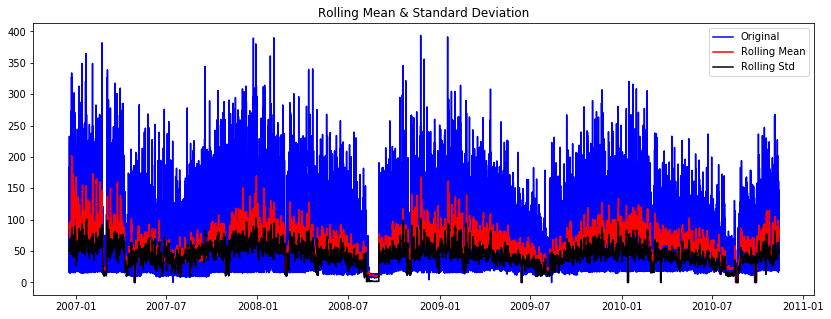

In [14]:
st.test_stationarity(data.global_active_power)

<Results of Dickey-Fuller Test>
Test Statistic                   -3.786244
p-value                           0.003051
#Lags Used                       22.000000
Number of Observations Used    1403.000000
Critical Value (10%)             -2.567868
Critical Value (1%)              -3.435019
Critical Value (5%)              -2.863602
dtype: float64


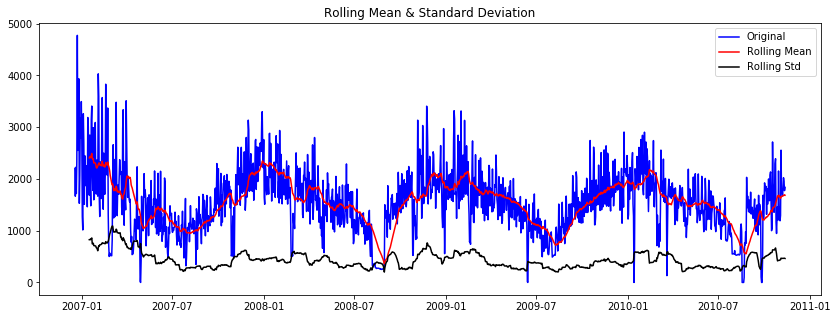

In [17]:
# Resampling over day totals to reduce noise
data_days = st.day_resample(data)

st.test_stationarity(data_days.global_active_power)